# Edgelist creation

In [1]:
import os
import io
import re
import networkx as nx
import netwulf as nw 
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_marvel = pd.read_csv("../files/marvel.csv", index_col=0, encoding='utf8')
df_marvel = df_marvel[df_marvel["WikiLink"].notna()]
df_dc = pd.read_csv("../files/dc.csv", index_col=0, encoding='utf8')
df_dc = df_dc[df_dc["WikiLink"].notna()]

df_marvel['universe'] = 'Marvel'
df_dc['universe'] = 'DC'

df = pd.concat([df_marvel, df_dc], ignore_index=True, axis=0)

In [3]:
def scan_folder(parent, timestamp = None, wikitexts = None):
    # iterate over all the files in directory 'parent'
    #print(parent)
    if wikitexts == None:
        wikitexts = []
    for file_name in os.listdir(parent):
        if file_name.endswith(".txt"):
            # if it's a txt file, print its name (or do whatever you want)
            if timestamp != None:
                #TODO implement timestamp choice
                x = None
            else:
                f = io.open(parent+'/'+file_name, 'r', encoding='utf-8').read()
                wikitexts.append((file_name[-23:-16].replace('.txt',''),f))
        else:
            current_path = "".join((parent, "/", file_name))
            if os.path.isdir(current_path):
                # if we're checking a sub-directory, recursively call this method
                scan_folder(current_path, timestamp=timestamp, wikitexts=wikitexts)
    
    return wikitexts

In [4]:
WikiLinks = df.WikiLink.tolist()
danger_zone = ['marvel',
'marvel cinematic universe',
'mcu',
'marvel comics character',
'marvel comics',
'character',
'comic book',
'comics',
'comics character',
'film series character',
'ultimate marvel character',
'dc comics',
'dc comics character',
'x-men',
'fantastic four',
'fiction',
'ion']

danger_zone2 = ['('+x.lower()+')' for x in danger_zone]
danger_zone3 = [x.lower() for x in danger_zone] + danger_zone2

In [8]:
path_folder = 'superheroes/'
link_name_map = dict(zip(df.CharacterName.tolist(), WikiLinks))
link_re = re.compile(r"\[\[(.*?)\]\]")

In [14]:
edgelist = pd.DataFrame(columns=['source', 'target', 'timestamp'])

In [15]:
edgelist

,source,target,timestamp


In [28]:
for idx, row in tqdm(df.iterrows()):
    try:
        wikipages = scan_folder(path_folder + row.CharacterName + '/')
        source_node = link_name_map[row.CharacterName]

        for timestamp, page in wikipages:
            links = re.findall(link_re, page)
            for link in links:
                status=False
                combined = '\t'.join(WikiLinks)

                if link in WikiLinks:
                    edgelist = edgelist.append({'source':source_node, 'target':link, 'timestamp':timestamp}, ignore_index=True)

                #Checking corner cases
                elif link in combined and link.lower() not in danger_zone3:
                    for wikilink in WikiLinks:
                        if link in wikilink:
                            edgelist = edgelist.append({'source':source_node, 'target':wikilink, 'timestamp':timestamp}, ignore_index=True)
                            status = True
                            break

                        elif '|' in link:
                            for name in link.split('|'):
                                if name == wikilink.split('|')[0]:
                                    edgelist = edgelist.append({'source':source_node, 'target':wikilink, 'timestamp':timestamp}, ignore_index=True)
                                    status=True
                                    break

                            if status==True:
                                break

    except Exception as e:
        print(f'The following error occured: {e}')

1677it [20:20,  1.44it/s]

The following error occured: [Errno 2] No such file or directory: 'superheroes/Vidar/'


2260it [39:13,  1.84s/it]

The following error occured: [Errno 2] No such file or directory: 'superheroes/Viperie/'


2265it [39:23,  2.81s/it]

The following error occured: [Errno 2] No such file or directory: 'superheroes/Vizacacha/'


2269it [39:26,  1.44s/it]

The following error occured: [Errno 2] No such file or directory: 'superheroes/Volthoom/'


2277it [39:43,  2.45s/it]

The following error occured: [Errno 2] No such file or directory: 'superheroes/Vroom, Hans/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/Vul, Tri/'


2281it [39:45,  1.30s/it]

The following error occured: [Errno 2] No such file or directory: "superheroes/X' Hal/"
The following error occured: [Errno 2] No such file or directory: 'superheroes/X-2-Y/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/X-5 Super Agent/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/X/'


2287it [39:45,  1.80it/s]

The following error occured: [Errno 2] No such file or directory: 'superheroes/Xardo/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/Xasnu/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/X-Bomb Betty/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/Xenofobe/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/Xeo/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/Xera/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/Xero/'
The following error occured: [Errno 2] No such file or directory: 'superheroes/Xiang-Fa/'


2298it [39:53,  1.36it/s]

The following error occured: [Errno 2] No such file or directory: 'superheroes/Xov/'


2303it [39:55,  1.04s/it]


In [29]:
edgelist.head()

,source,target,timestamp
0,Abomination (character),Silver Surfer,2014-12
1,Abomination (character),Thor (Marvel Comics),2014-12
2,Abomination (character),Sprocket (comics),2014-12
3,Abomination (character),Glenn Talbot,2014-12
4,Abomination (character),MODOK,2014-12


In [30]:
#edgelist.to_csv("edgelist.csv", index=False)

In [36]:
edgelist['timestamp'] = [time[:4] for time in edgelist['timestamp']]

In [66]:
#edgelist.to_csv("edgelist_agg.csv", index=False)

In [194]:
edgelist = pd.read_csv("edgelist_agg.csv")
edgelist.head()

,source,target,timestamp
0,Abomination (character),Silver Surfer,2014
1,Abomination (character),Thor (Marvel Comics),2014
2,Abomination (character),Sprocket (comics),2014
3,Abomination (character),Glenn Talbot,2014
4,Abomination (character),MODOK,2014


# Descriptive statistics of edges

In [172]:
counts = edgelist.groupby("timestamp").size()
counts

timestamp
2001       45
2002      140
2003      392
2004     1556
2005     5268
2006    10942
2007    13546
2008    15218
2009    17038
2010    18304
2011    18660
2012    19394
2013    20118
2014    20289
2015    21689
2016    22347
2017    23024
2018    23660
2019    24135
2020    24762
2021    24961
2022    24237
dtype: int64

In [51]:
import matplotlib as mpl

In [56]:
def setup_mpl():
    mpl.rcParams['font.family'] = "Times New Roman"
    return
setup_mpl()

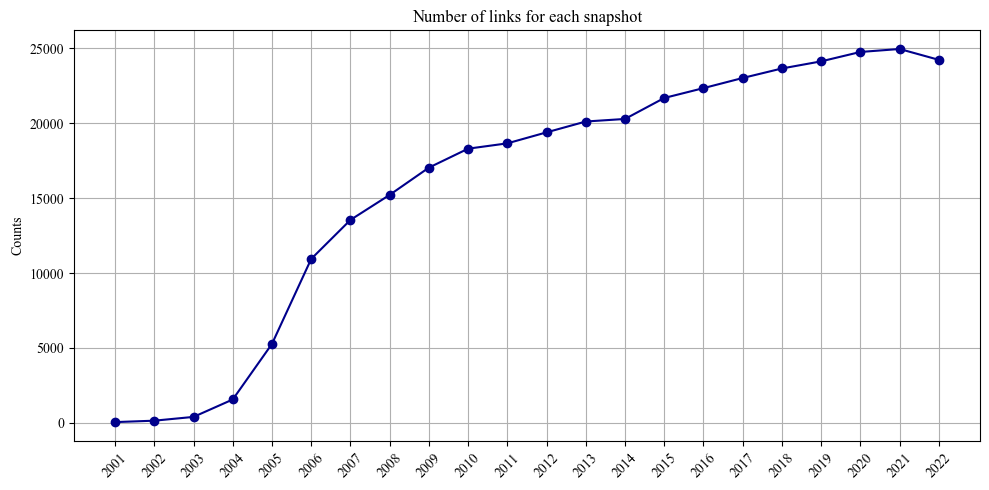

In [65]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(counts.index, counts.values, '-o', c='darkblue')
ax.set_title("Number of links for each snapshot")
ax.set_ylabel("Counts")
#ax.set_yscale("log")
ax.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Investigation of issue with edgelist
The above edgelist depends on the wikipage being revised every year after the page has been introduced. This could potentially create some tricky corner cases, where a wikipage have remained unaltered doing a specific year. Hence, the edgelist will be empty for that specific year, which is not correct given that the wikipage is still present eventhough it has not been altered.

In [195]:
temp = edgelist.groupby(["source", "timestamp"]).size().reset_index()

In [144]:
temp.head(15)

,source,timestamp,0
0,3-D Man,2007,2
1,3-D Man,2008,3
2,3-D Man,2009,6
3,3-D Man,2010,6
4,3-D Man,2011,5
5,3-D Man,2012,5
6,3-D Man,2013,5
7,3-D Man,2014,5
8,3-D Man,2015,5
9,3-D Man,2016,5


In [196]:
len(edgelist)

349725

In [197]:
counter = 0
superheroes = list(edgelist.source.unique())
for superhero in superheroes:
    years = sorted(temp[temp['source']==superhero].timestamp.values)
    for previous, current in zip(years, years[1:]):
        if int(current) - int(previous) > 1:
            prev_links = edgelist[(edgelist['source']==superhero)&(edgelist['timestamp']==previous)]
            for single_date in (int(previous) + n for n in range(1,int(current) - int(previous))):
                #prev_links['timestamp'] = [str(single_date)]*len(prev_links)
                prev_links = prev_links.assign(timestamp=single_date)
                edgelist = edgelist.append(prev_links, ignore_index=True)

In [176]:
len(edgelist)

356176

In [152]:
temp = edgelist.groupby(["source", "timestamp"]).size().reset_index()

In [101]:
previous = 2011
current = 2020
for single_date in (previous + n for n in range(1,current - previous)):
    print(single_date)

2012
2013
2014
2015
2016
2017
2018
2019


In [206]:
counter = 0
superheroes = list(edgelist.source.unique())
for superhero in superheroes:
    years = sorted(temp[temp['source']==superhero].timestamp.values)
    for previous, current in zip(years, years[1:]):
        if int(current) - int(previous) > 1:
            print(superhero)
            print(previous, current)
            counter += 1

In [207]:
counter

0

This solved the issue with gap between revision years, but we still have an issue with pages not being altered in 2022 but has been altered in 2021, which would not be discovered by the above code.

In [205]:
counter = 0
superheroes = list(edgelist.source.unique())
for superhero in superheroes:
    years = sorted(temp[temp['source']==superhero].timestamp.values)
    if 2022 not in years and 2021 in years:
        counter += 1
print(counter)

0


In [179]:
counter = 0
superheroes = list(edgelist.source.unique())
for superhero in superheroes:
    years = sorted(temp[temp['source']==superhero].timestamp.values)
    if 2022 not in years and 2021 in years:
        prev_link = edgelist[(edgelist.source==superhero)&(edgelist.timestamp==2021)]
        prev_link = prev_links.assign(timestamp=2022)
        edgelist = edgelist.append(prev_link, ignore_index=True)

# Descriptive statistics on corrected edgelist 

In [180]:
counts = edgelist.groupby("timestamp").size()
counts

timestamp
2001       45
2002      140
2003      399
2004     1557
2005     5278
2006    10963
2007    13586
2008    15297
2009    17223
2010    18483
2011    19216
2012    19905
2013    20639
2014    21390
2015    22142
2016    22929
2017    23758
2018    24037
2019    24676
2020    25141
2021    25135
2022    24433
dtype: int64

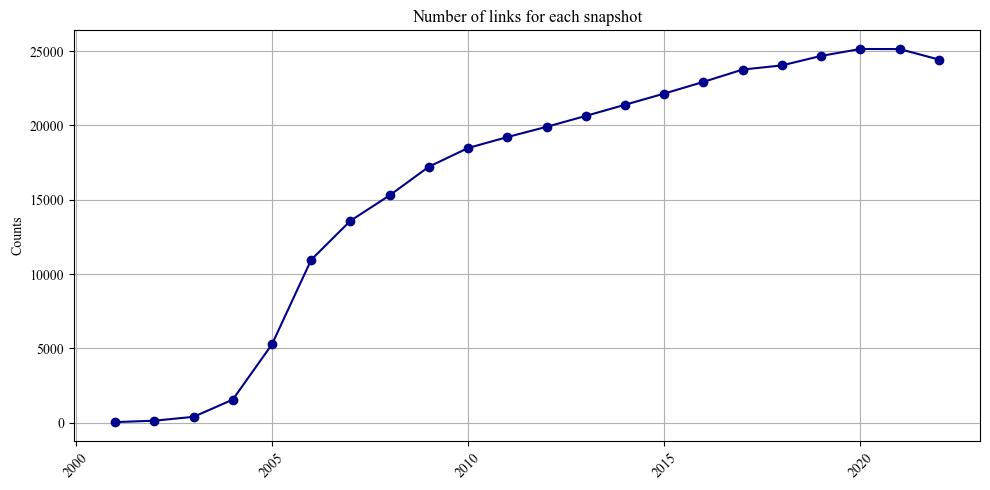

In [181]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(counts.index, counts.values, '-o', c='darkblue')
ax.set_title("Number of links for each snapshot")
ax.set_ylabel("Counts")
#ax.set_yscale("log")
ax.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We still see a perculiar dip in the number of links at year 2022. It could perhaps be caused by wikipages not being revised after a certain year e.g. 2011. We assume that it is reasonable to treat this case, as the page remaining the same from the last year up to 2022, given that we know that the page exist. Otherwise, we would not have been able to find the page in the first place.

In [198]:
temp = edgelist.groupby(["source", "timestamp"]).size().reset_index()

In [204]:
counter = 0
superheroes = list(edgelist.source.unique())
for superhero in superheroes:
    years = sorted(temp[temp['source']==superhero].timestamp.values)
    last_year = max(years)
    if last_year != 2022:
        counter += 1
print(counter)

0


In [199]:
superheroes = list(edgelist.source.unique())
for superhero in superheroes:
    years = sorted(temp[temp['source']==superhero].timestamp.values)
    last_year = max(years)
    if last_year != 2022:
        prev_links = edgelist[(edgelist['source']==superhero)&(edgelist['timestamp']==last_year)]
        for single_date in (int(last_year) + n for n in range(1,2022 - last_year + 1)):
            prev_links = prev_links.assign(timestamp=single_date)
            edgelist = edgelist.append(prev_links, ignore_index=True)

In [200]:
temp = edgelist.groupby(["source", "timestamp"]).size().reset_index()

In [201]:
counter = 0
superheroes = list(edgelist.source.unique())
for superhero in superheroes:
    years = sorted(temp[temp['source']==superhero].timestamp.values)
    last_year = max(years)
    if last_year != 2022:
        counter += 1
print(counter)

0


In [202]:
counts = edgelist.groupby("timestamp").size()
counts

timestamp
2001       45
2002      140
2003      399
2004     1557
2005     5278
2006    10963
2007    13591
2008    15306
2009    17237
2010    18501
2011    19247
2012    19939
2013    20690
2014    21470
2015    22232
2016    23027
2017    23886
2018    24303
2019    25353
2020    26034
2021    26155
2022    25860
dtype: int64

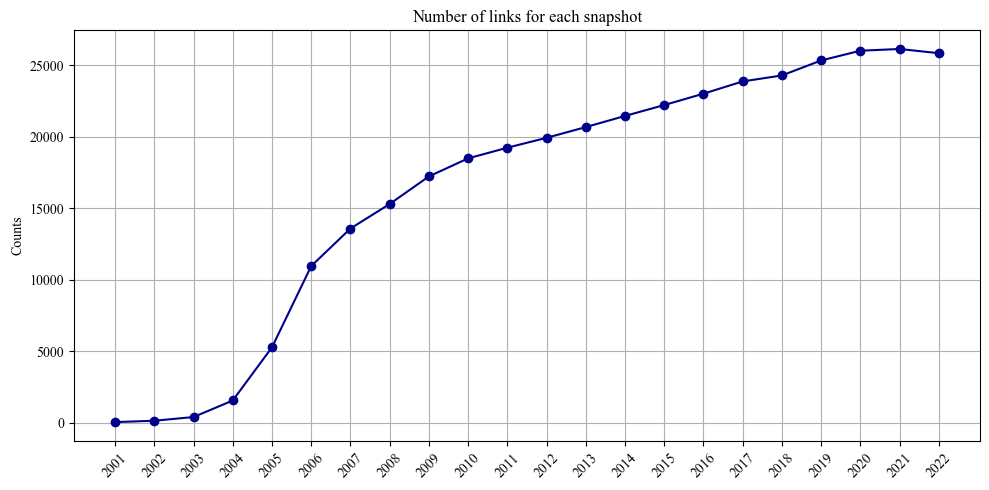

In [209]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(counts.index.astype(str), counts.values, '-o', c='darkblue')
ax.set_title("Number of links for each snapshot")
ax.set_ylabel("Counts")
#ax.set_yscale("log")
ax.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [208]:
edgelist.to_csv("corrected_edgelist.csv", index=False)